# Problem Definition & Notes
- Objective
    - Build ML model to predict delivery time
- Core ML Problem
    - Regression Problem
- Evaluation Metric
    - RMSE
- Data Processing
    - Import Data
    - ETL
    - Perform EDA
    - Train-Test Split
    - Data cleansing
    - Feature Engineering
    - Feature Selection
    - Feature scaling/encoding
- Model Architecture
    - Baseline Model
    - ML Model
    - Loss Function
    - Cross-Validation Technique
- Offline Evaluation
    - Evaluate on Test Set (aggregated metric)
    - Evaluate ML model & baseline model
    - Evalaute various segments of data

# Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
import sys
sys.path.append('../src')

from config import *
from etl import *
from data_processing import *
from model_training import *
from models import *
from utils import *

# Import Data

In [3]:
df_raw_data = import_data(order_data_path_csv)
df_raw_data.head()

Data loaded to Pandas dataframe


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
validate_schema(df_raw_data, raw_data_expected_columns)

True

In [5]:
validate_dtypes(df_raw_data, raw_data_expected_columns)

True

# ETL

In [6]:
df_etl_data = format_raw_data(df_raw_data)

/Users/ani/Projects/7_SKIP_interview_practice/notebooks/../src/etl.py:31: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_processed['order_date'] = pd.to_datetime(df_processed['order_date'], errors='coerce').dt.strftime("%Y-%m-%d")
/Users/ani/Projects/7_SKIP_interview_practice/notebooks/../src/etl.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['time_orderd'] = pd.to_datetime(df_processed['time_orderd'], errors='coerce').dt.strftime("%H:%M:%S")
/Users/ani/Projects/7_SKIP_interview_practice/notebooks/../src/etl.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['t

       delivery_person_age  delivery_person_ratings  restaurant_latitude  \
count         43739.000000             43685.000000         45593.000000   
mean             29.567137                 4.633780            17.017729   
std               5.815155                 0.334716             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.546947   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 6.000000            30.914057   

       restaurant_longitude  delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73

# Data Pre-Processing

##### Train-Test Split

In [7]:
df_train, df_test = train_test_split_time_based(df_etl_data, 0.8)

##### Imput Missing Values

In [8]:
df_train_imputed, df_test_imputed = impute_missing_values(df_train, df_test, mean_impute_columns, median_impute_columns, mode_impute_columns)
df_test_imputed

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
36474,0xbd01,PUNERES09DEL03,30.000000,4.6,18.536562,73.896485,18.626562,73.986485,2022-03-29,19:30:00,19:45:00,conditionscloudy,jam,1,buffet,motorcycle,0.0,no,metropolitian,46
36475,0x5980,PUNERES07DEL01,28.000000,4.0,18.546947,73.900626,18.616947,73.970626,2022-03-29,19:30:00,19:45:00,conditionswindy,jam,0,buffet,motorcycle,0.0,no,metropolitian,38
36476,0x6ff3,MUMRES18DEL01,28.000000,4.7,19.109300,72.825451,19.179300,72.895451,2022-03-29,19:30:00,19:40:00,conditionssandstorms,jam,2,buffet,motorcycle,0.0,no,urban,24
36477,0x4a6f,VADRES15DEL02,35.000000,3.5,0.000000,0.000000,0.080000,0.080000,2022-03-29,19:30:00,19:40:00,conditionswindy,jam,2,buffet,scooter,1.0,no,urban,34
36478,0x4f5d,COIMBRES03DEL01,37.000000,4.9,11.025083,77.015393,11.095083,77.085393,2022-03-29,19:30:00,19:40:00,conditionssunny,jam,1,buffet,motorcycle,1.0,no,urban,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x1396,HYDRES03DEL01,29.567968,4.7,17.422819,78.449578,17.492819,78.519578,2022-04-06,17:55:00,22:50:00,conditionsfog,low,2,drinks,scooter,1.0,no,urban,25
45589,0x4ca,MYSRES05DEL01,29.567968,4.7,12.323978,76.627961,12.433978,76.737961,2022-04-06,17:55:00,19:25:00,conditionsfog,jam,1,meal,motorcycle,1.0,no,urban,41
45590,0x4fe,SURRES04DEL03,29.567968,4.7,-21.173493,-72.801953,21.263493,72.891953,2022-04-06,17:55:00,19:15:00,conditionsstormy,jam,1,drinks,scooter,1.0,no,metropolitian,23
45591,0x576,HYDRES11DEL02,29.567968,4.7,-17.430448,78.418213,17.560448,78.548213,2022-04-06,17:55:00,22:45:00,conditionsfog,low,2,meal,scooter,1.0,no,metropolitian,37


##### Feature Engineering

In [9]:
df_train_imputed, df_test_imputed = straight_line_distance(df_train_imputed, df_test_imputed)
df_test_imputed

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,distance
36474,0xbd01,PUNERES09DEL03,30.000000,4.6,2022-03-29,19:30:00,19:45:00,conditionscloudy,jam,1,buffet,motorcycle,0.0,no,metropolitian,46,13.788852
36475,0x5980,PUNERES07DEL01,28.000000,4.0,2022-03-29,19:30:00,19:45:00,conditionswindy,jam,0,buffet,motorcycle,0.0,no,metropolitian,38,10.724652
36476,0x6ff3,MUMRES18DEL01,28.000000,4.7,2022-03-29,19:30:00,19:40:00,conditionssandstorms,jam,2,buffet,motorcycle,0.0,no,urban,24,10.707675
36477,0x4a6f,VADRES15DEL02,35.000000,3.5,2022-03-29,19:30:00,19:40:00,conditionswindy,jam,2,buffet,scooter,1.0,no,urban,34,12.580268
36478,0x4f5d,COIMBRES03DEL01,37.000000,4.9,2022-03-29,19:30:00,19:40:00,conditionssunny,jam,1,buffet,motorcycle,1.0,no,urban,22,10.905989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x1396,HYDRES03DEL01,29.567968,4.7,2022-04-06,17:55:00,22:50:00,conditionsfog,low,2,drinks,scooter,1.0,no,urban,25,10.757205
45589,0x4ca,MYSRES05DEL01,29.567968,4.7,2022-04-06,17:55:00,19:25:00,conditionsfog,jam,1,meal,motorcycle,1.0,no,urban,41,17.097973
45590,0x4fe,SURRES04DEL03,29.567968,4.7,2022-04-06,17:55:00,19:15:00,conditionsstormy,jam,1,drinks,scooter,1.0,no,metropolitian,23,16466.194147
45591,0x576,HYDRES11DEL02,29.567968,4.7,2022-04-06,17:55:00,22:45:00,conditionsfog,low,2,meal,scooter,1.0,no,metropolitian,37,3890.836127


In [10]:
df_train_imputed, df_test_imputed = date_time_features(df_train_imputed, df_test_imputed)
df_test_imputed

/Users/ani/Projects/7_SKIP_interview_practice/notebooks/../src/data_processing.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_of_day'] = pd.to_datetime(df['time_orderd']).dt.hour
/Users/ani/Projects/7_SKIP_interview_practice/notebooks/../src/data_processing.py:81: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_of_day'] = pd.to_datetime(df['time_orderd']).dt.hour


,id,delivery_person_id,delivery_person_age,delivery_person_ratings,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,distance,day_of_week,hour_of_day
36474,0xbd01,PUNERES09DEL03,30.000000,4.6,conditionscloudy,jam,1,buffet,motorcycle,0.0,no,metropolitian,46,13.788852,1,19
36475,0x5980,PUNERES07DEL01,28.000000,4.0,conditionswindy,jam,0,buffet,motorcycle,0.0,no,metropolitian,38,10.724652,1,19
36476,0x6ff3,MUMRES18DEL01,28.000000,4.7,conditionssandstorms,jam,2,buffet,motorcycle,0.0,no,urban,24,10.707675,1,19
36477,0x4a6f,VADRES15DEL02,35.000000,3.5,conditionswindy,jam,2,buffet,scooter,1.0,no,urban,34,12.580268,1,19
36478,0x4f5d,COIMBRES03DEL01,37.000000,4.9,conditionssunny,jam,1,buffet,motorcycle,1.0,no,urban,22,10.905989,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x1396,HYDRES03DEL01,29.567968,4.7,conditionsfog,low,2,drinks,scooter,1.0,no,urban,25,10.757205,2,17
45589,0x4ca,MYSRES05DEL01,29.567968,4.7,conditionsfog,jam,1,meal,motorcycle,1.0,no,urban,41,17.097973,2,17
45590,0x4fe,SURRES04DEL03,29.567968,4.7,conditionsstormy,jam,1,drinks,scooter,1.0,no,metropolitian,23,16466.194147,2,17
45591,0x576,HYDRES11DEL02,29.567968,4.7,conditionsfog,low,2,meal,scooter,1.0,no,metropolitian,37,3890.836127,2,17


In [11]:
df_train_imputed, df_test_imputed = driver_statistics(df_train_imputed, df_test_imputed)

In [12]:
assert df_train_imputed.isna().sum().sum() == 0, 'Missing Values in dataset'
assert df_test_imputed.isna().sum().sum() == 0, 'Missing Values in dataset'

##### Feature Selection

##### Feature Scaling/Encoding

In [13]:
df_train_imputed, df_test_imputed = feature_scaling_encoding(df_train_imputed, df_test_imputed)

In [35]:
target = ['time_taken_min']

features = ['delivery_person_age',
 'vehicle_condition',
 'multiple_deliveries',
 'distance',
 'day_of_week',
 'hour_of_day',
 'driver_speed',
 'avg_driver_rating',
 'weatherconditions_conditionscloudy',
 'weatherconditions_conditionsfog',
 'weatherconditions_conditionsnan',
 'weatherconditions_conditionssandstorms',
 'weatherconditions_conditionsstormy',
 'weatherconditions_conditionssunny',
 'weatherconditions_conditionswindy',
 'road_traffic_density_high',
 'road_traffic_density_jam',
 'road_traffic_density_low',
 'road_traffic_density_medium',
 'type_of_order_buffet',
 'type_of_order_drinks',
 'type_of_order_meal',
 'type_of_order_snack',
 'type_of_vehicle_bicycle',
 'type_of_vehicle_electric_scooter',
 'type_of_vehicle_motorcycle',
 'type_of_vehicle_scooter',
 'festival_no',
 'festival_yes',
 'city_metropolitian',
 'city_semi_urban',
 'city_urban']

['delivery_person_age',
 'vehicle_condition',
 'multiple_deliveries',
 'distance',
 'day_of_week',
 'hour_of_day',
 'driver_speed',
 'avg_driver_rating',
 'weatherconditions_conditionscloudy',
 'weatherconditions_conditionsfog',
 'weatherconditions_conditionsnan',
 'weatherconditions_conditionssandstorms',
 'weatherconditions_conditionsstormy',
 'weatherconditions_conditionssunny',
 'weatherconditions_conditionswindy',
 'road_traffic_density_high',
 'road_traffic_density_jam',
 'road_traffic_density_low',
 'road_traffic_density_medium',
 'type_of_order_buffet',
 'type_of_order_drinks',
 'type_of_order_meal',
 'type_of_order_snack',
 'type_of_vehicle_bicycle',
 'type_of_vehicle_electric_scooter',
 'type_of_vehicle_motorcycle',
 'type_of_vehicle_scooter',
 'festival_no',
 'festival_yes',
 'city_metropolitian',
 'city_semi_urban',
 'city_urban']

# Model Architecture

In [15]:
df_train_x, df_train_y, df_train_id, df_test_x, df_test_y, df_test_id = feature_target_split(df_train_imputed, df_test_imputed, features, target)

##### Baseline Model

In [16]:
baseline_model = BaselineModel()
baseline_model.fit(df_train)
baseline_predictions = baseline_model.predict(df_test)
baseline_predictions

,id,baseline_predictions
0,0xbd01,27.293102
1,0x5980,27.293102
2,0x6ff3,23.009169
3,0x4a6f,23.009169
4,0x4f5d,23.009169
...,...,...
9114,0x1396,23.009169
9115,0x4ca,23.009169
9116,0x4fe,27.293102
9117,0x576,27.293102


In [ ]:
decision_tree_model = GradientBoostedDecisionTree()
gbdt_params = {
    'fixed_params': {
        'objective': 'regression',
        'metric': 'rmse',
        'verbose': -1
    },
    'search_space': {
        'n_estimators': {'type': 'int', 'low': 50, 'high': 1000},
        'num_leaves': {'type': 'int', 'low': 2, 'high': 256},
        'max_depth': {'type': 'int', 'low': 2, 'high': 32},
        'min_child_samples': {'type': 'int', 'low': 20, 'high': 100},
        'subsample': {'type': 'float', 'low': 0.6, 'high': 1.0},
        'colsample_bytree': {'type': 'float', 'low': 0.6, 'high': 1.0}
    }
}

gbdt_n_splits = 3
gbdt_n_trials = 5

best_params = hyperparameter_tuning(df_train_x, df_train_y, gbdt_n_splits, gbdt_n_trials, gbdt_params, decision_tree_model)
best_params

[I 2025-12-04 12:30:37,379] A new study created in memory with name: no-name-0bde368b-ffac-4586-b5fb-c8663fc063e0
[I 2025-12-04 12:30:39,034] Trial 0 finished with value: 4.229394973575621 and parameters: {'n_estimators': 205, 'num_leaves': 58, 'max_depth': 7, 'min_child_samples': 34, 'subsample': 0.8799000734481405, 'colsample_bytree': 0.8075872767644139}. Best is trial 0 with value: 4.229394973575621.
[I 2025-12-04 12:30:39,886] Trial 1 finished with value: 4.41881112355474 and parameters: {'n_estimators': 56, 'num_leaves': 189, 'max_depth': 6, 'min_child_samples': 77, 'subsample': 0.6984657248371188, 'colsample_bytree': 0.7229532026671508}. Best is trial 0 with value: 4.229394973575621.
[I 2025-12-04 12:30:43,735] Trial 2 finished with value: 4.216286223770259 and parameters: {'n_estimators': 600, 'num_leaves': 170, 'max_depth': 22, 'min_child_samples': 20, 'subsample': 0.9542458174733545, 'colsample_bytree': 0.7577482976610669}. Best is trial 2 with value: 4.216286223770259.
[I 202

{'n_estimators': 600,
 'num_leaves': 170,
 'max_depth': 22,
 'min_child_samples': 20,
 'subsample': 0.9542458174733545,
 'colsample_bytree': 0.7577482976610669,
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': -1}

In [28]:
decision_tree_model = GradientBoostedDecisionTree(params=best_params)
decision_tree_model.fit(X=df_train_x, y=df_train_y)
model_predictions = decision_tree_model.predict(X=df_test_x, df_id=df_test_id)
model_predictions

,id,GradientBoostedDecisionTree_predictions
0,0xbd01,43.229884
1,0x5980,32.150047
2,0x6ff3,23.821523
3,0x4a6f,30.709548
4,0x4f5d,21.291871
...,...,...
9114,0x1396,25.789091
9115,0x4ca,35.375069
9116,0x4fe,20.373232
9117,0x576,23.415121


# Evaluate

<Axes: xlabel='features'>

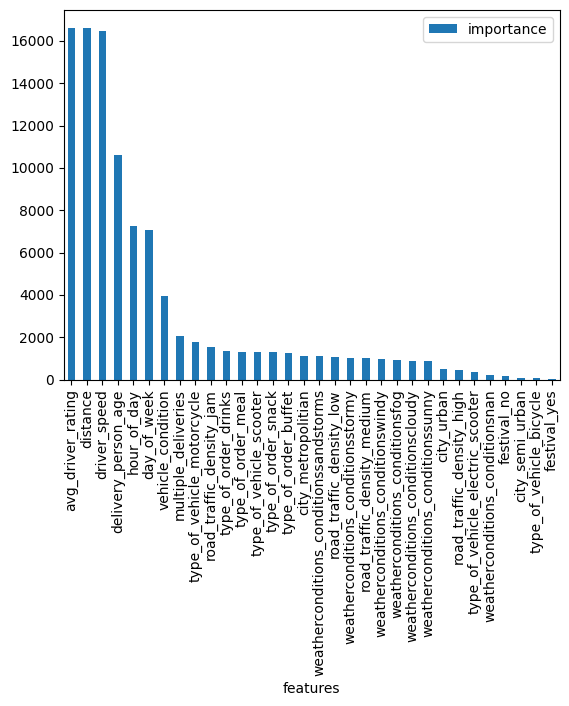

In [29]:
df_feature_importance = pd.DataFrame({
    'features': decision_tree_model.model.feature_name(),
    'importance': decision_tree_model.model.feature_importance()
})
df_feature_importance.sort_values('importance', ascending=False).plot(kind='bar', x='features', y='importance')

In [30]:
df_actual = df_test_id.merge(df_test_y, how='left', left_index=True, right_index=True)
df_actual

,id,time_taken_min
0,0xbd01,46
1,0x5980,38
2,0x6ff3,24
3,0x4a6f,34
4,0x4f5d,22
...,...,...
9114,0x1396,25
9115,0x4ca,41
9116,0x4fe,23
9117,0x576,37


In [31]:
df_evaluate = pd.merge(df_actual, baseline_predictions, how='left', on='id').merge(model_predictions, how='left', on='id')
df_evaluate

,id,time_taken_min,baseline_predictions,GradientBoostedDecisionTree_predictions
0,0xbd01,46,27.293102,43.229884
1,0x5980,38,27.293102,32.150047
2,0x6ff3,24,23.009169,23.821523
3,0x4a6f,34,23.009169,30.709548
4,0x4f5d,22,23.009169,21.291871
...,...,...,...,...
9114,0x1396,25,23.009169,25.789091
9115,0x4ca,41,23.009169,35.375069
9116,0x4fe,23,27.293102,20.373232
9117,0x576,37,27.293102,23.415121


In [32]:
df_evaluate['abs_model_error'] = np.abs(df_evaluate['time_taken_min'] - df_evaluate['GradientBoostedDecisionTree_predictions'])
df_evaluate['abs_baseline_error'] = np.abs(df_evaluate['time_taken_min'] - df_evaluate['baseline_predictions'])

df_evaluate['model_error'] = (df_evaluate['time_taken_min'] - df_evaluate['GradientBoostedDecisionTree_predictions'])
df_evaluate['baseline_error'] = (df_evaluate['time_taken_min'] - df_evaluate['baseline_predictions'])

df_evaluate

,id,time_taken_min,baseline_predictions,GradientBoostedDecisionTree_predictions,abs_model_error,abs_baseline_error,model_error,baseline_error
0,0xbd01,46,27.293102,43.229884,2.770116,18.706898,2.770116,18.706898
1,0x5980,38,27.293102,32.150047,5.849953,10.706898,5.849953,10.706898
2,0x6ff3,24,23.009169,23.821523,0.178477,0.990831,0.178477,0.990831
3,0x4a6f,34,23.009169,30.709548,3.290452,10.990831,3.290452,10.990831
4,0x4f5d,22,23.009169,21.291871,0.708129,1.009169,0.708129,-1.009169
...,...,...,...,...,...,...,...,...
9114,0x1396,25,23.009169,25.789091,0.789091,1.990831,-0.789091,1.990831
9115,0x4ca,41,23.009169,35.375069,5.624931,17.990831,5.624931,17.990831
9116,0x4fe,23,27.293102,20.373232,2.626768,4.293102,2.626768,-4.293102
9117,0x576,37,27.293102,23.415121,13.584879,9.706898,13.584879,9.706898


In [33]:
baseline_rmse = np.sqrt(np.mean(df_evaluate['abs_baseline_error'] ** 2))
model_rmse = np.sqrt(np.mean(df_evaluate['abs_model_error'] ** 2))

print(f'Model RMSE: {model_rmse}')
print(f'Baseline RMSE: {baseline_rmse}')


Model RMSE: 4.4072313425309
Baseline RMSE: 9.170263721426407
